,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Categorical features detected: ['cut', 'color', 'clarity']
Unique categories per feature before encoding:
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Number of samples: 53940
Number of features before encoding and scaling: 9
Number of features used in model: 6
Mean Squared Error (Linear Regression): 2242178.90
R-squared Score (Linear Regression): 0.8590


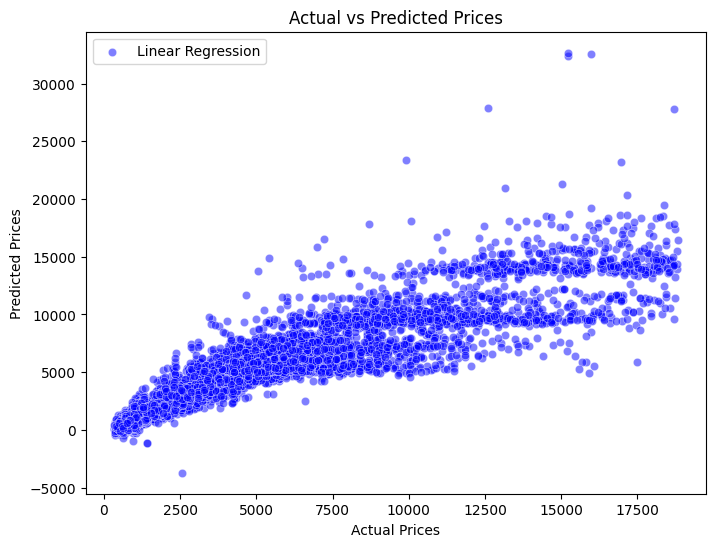

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diamonds dataset from seaborn
df = sns.load_dataset("diamonds")

# Display first few rows before preprocessing
display(df.head())

# Drop irrelevant columns and handle missing values
df.dropna(inplace=True)  # Removing missing values

# Manually define categorical features (ensure they are correctly detected)
categorical_features = ["cut", "color", "clarity"]  # Explicitly specifying categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop("price")

# Convert categorical features to string (if they were mistakenly numerical)
for col in categorical_features:
    df[col] = df[col].astype(str)

# Print detected categorical features
print("Categorical features detected:", categorical_features)

# Verify unique values in categorical features
print("Unique categories per feature before encoding:")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

# Print the number of samples and features before encoding and scaling
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features before encoding and scaling: {df.shape[1] - 1}")  # Excluding target variable

"""
# TODO: Task 1 - Uncomment the following section to apply One-Hot Encoding and Feature Scaling
# Instructions:
# - Uncomment the code below.
# - Run the program and compare results with and without encoding/scaling.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Drop first category to avoid redundancy.
categorical_encoded = encoder.fit_transform(df[categorical_features])

# Convert encoded features into a DataFrame with proper column names
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_features))

# Print the number of encoded features after dropping the first category
print(f"Number of encoded features after dropping first category: {categorical_encoded_df.shape[1]}")

# Standardize numerical features to bring them to the same scale
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Combine processed features into a single dataset
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)
"""

# ---- TEMPORARY: Using raw numerical data ----
# TODO: Task 1: Comment the following line to use the encoded and scaled features
# Since encoding and scaling are commented out, we will use only numerical features without transformation.
X = df[numerical_features]  # Directly using numerical features without transformation

# Target variable
y = df["price"]

# Print the number of features after skipping encoding and scaling
print(f"Number of features used in model: {X.shape[1]}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

"""
# TODO: Task 2 - Uncomment the following section to apply Ridge Regularization (L2)
# Instructions:
# - Uncomment the code below.
# - Compare results with and without regularization.
# - Adjust the alpha parameter to see how regularization strength affects performance.

alpha_value = 1  # Regularization strength, can be adjusted
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Predict on test set using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
"""

# Predict on test set using Linear Regression
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse:.2f}")
print(f"R-squared Score (Linear Regression): {r2:.4f}")

"""
# TODO: Task 2 - Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge Regression, alpha={alpha_value}): {mse_ridge:.2f}")
print(f"R-squared Score (Ridge Regression, alpha={alpha_value}): {r2_ridge:.4f}")
"""

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label="Linear Regression", color="blue")

"""
# TODO: Task 2 - Add Ridge Regression to the plot
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5, label="Ridge Regression", color="red")
"""

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

# ---- LAB EXERCISE INSTRUCTIONS ----
# Step 1: Run the code as it is and note the model performance.
# Step 2: Uncomment Task 1 (Encoding and Scaling), run again, and compare results.
# Step 3: Uncomment Task 2 (Ridge Regularization), run again, and compare results.
# Step 4: Adjust the alpha value in Ridge Regression to observe its effect on performance.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Categorical features detected: ['cut', 'color', 'clarity']
Unique categories per feature before encoding:
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Number of samples: 53940
Number of features before encoding and scaling: 9
Number of encoded features after dropping first category: 17
Number of features used in model: 23
Mean Squared Error (Linear Regression): 1288705.48
R-squared Score (Linear Regression): 0.9189


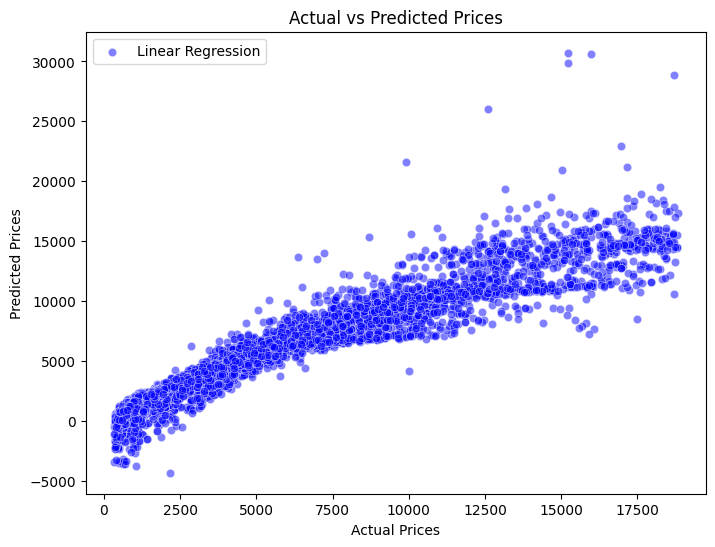

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diamonds dataset from seaborn
df = sns.load_dataset("diamonds")

# Display first few rows before preprocessing
display(df.head())

# Drop irrelevant columns and handle missing values
df.dropna(inplace=True)  # Removing missing values

# Manually define categorical features (ensure they are correctly detected)
categorical_features = ["cut", "color", "clarity"]  # Explicitly specifying categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop("price")

# Convert categorical features to string (if they were mistakenly numerical)
for col in categorical_features:
    df[col] = df[col].astype(str)

# Print detected categorical features
print("Categorical features detected:", categorical_features)

# Verify unique values in categorical features
print("Unique categories per feature before encoding:")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

# Print the number of samples and features before encoding and scaling
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features before encoding and scaling: {df.shape[1] - 1}")  # Excluding target variable


# TODO: Task 1 - Uncomment the following section to apply One-Hot Encoding and Feature Scaling
# Instructions:
# - Uncomment the code below.
# - Run the program and compare results with and without encoding/scaling.

from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Drop first category to avoid redundancy.
categorical_encoded = encoder.fit_transform(df[categorical_features])

# Convert encoded features into a DataFrame with proper column names
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_features))

# Print the number of encoded features after dropping the first category
print(f"Number of encoded features after dropping first category: {categorical_encoded_df.shape[1]}")

# Standardize numerical features to bring them to the same scale
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Combine processed features into a single dataset
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)


# ---- TEMPORARY: Using raw numerical data ----
# TODO: Task 1: Comment the following line to use the encoded and scaled features
# Since encoding and scaling are commented out, we will use only numerical features without transformation.
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)  # Directly using numerical features without transformation

# Target variable
y = df["price"]

# Print the number of features after skipping encoding and scaling
print(f"Number of features used in model: {X.shape[1]}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

"""
# TODO: Task 2 - Uncomment the following section to apply Ridge Regularization (L2)
# Instructions:
# - Uncomment the code below.
# - Compare results with and without regularization.
# - Adjust the alpha parameter to see how regularization strength affects performance.

alpha_value = 1  # Regularization strength, can be adjusted
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Predict on test set using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
"""

# Predict on test set using Linear Regression
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse:.2f}")
print(f"R-squared Score (Linear Regression): {r2:.4f}")

"""
# TODO: Task 2 - Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge Regression, alpha={alpha_value}): {mse_ridge:.2f}")
print(f"R-squared Score (Ridge Regression, alpha={alpha_value}): {r2_ridge:.4f}")
"""

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label="Linear Regression", color="blue")

"""
# TODO: Task 2 - Add Ridge Regression to the plot
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5, label="Ridge Regression", color="red")
"""

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

# ---- LAB EXERCISE INSTRUCTIONS ----
# Step 1: Run the code as it is and note the model performance.
# Step 2: Uncomment Task 1 (Encoding and Scaling), run again, and compare results.
# Step 3: Uncomment Task 2 (Ridge Regularization), run again, and compare results.
# Step 4: Adjust the alpha value in Ridge Regression to observe its effect on performance.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Categorical features detected: ['cut', 'color', 'clarity']
Unique categories per feature before encoding:
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Number of samples: 53940
Number of features before encoding and scaling: 9
Number of features used in model: 23


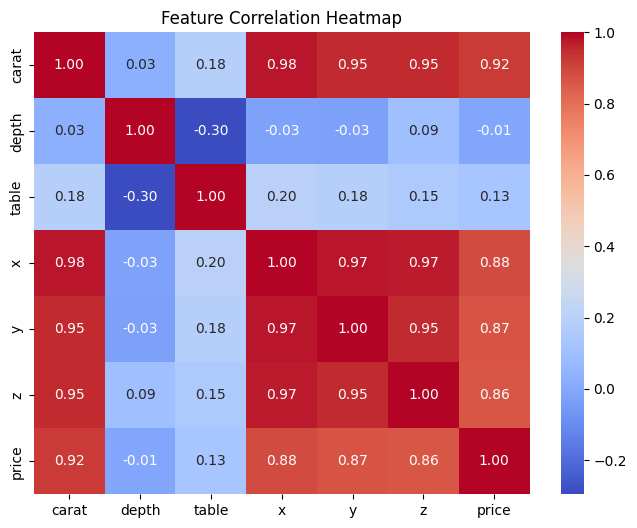

Mean Squared Error (Linear Regression): 1288705.48
R-squared Score (Linear Regression): 0.9189
Mean Squared Error (Ridge Regression, alpha=100): 1371290.77
R-squared Score (Ridge Regression, alpha=100): 0.9137

Linear Regression Coefficients:
[ 5.34716905e+03 -9.32499115e+01 -5.94369450e+01 -1.13077101e+03
 -4.02992815e+00 -2.57319198e+01  5.91797169e+02  8.58815946e+02
  7.81928178e+02  7.49952180e+02 -2.18198603e+02 -2.79716403e+02
 -4.95581527e+02 -9.99086408e+02 -1.47958447e+03 -2.37201983e+03
  5.36594460e+03  3.67541455e+03  2.70143997e+03  4.57990554e+03
  4.26361564e+03  5.01529292e+03  4.95821145e+03]

Ridge Regression Coefficients:
[ 4986.28196108  -108.19018637   -77.69665558  -824.05448679
    -5.04152109   -37.63730245   571.21682755   852.75879523
   764.02363327   758.10039602  -123.4097881   -180.39877261
  -370.69419738  -864.28490807 -1296.47075628 -2109.89628339
  2742.85829818  1279.92182998   353.00272909  2135.16865423
  1850.16484542  2510.19667619  2486.79727387

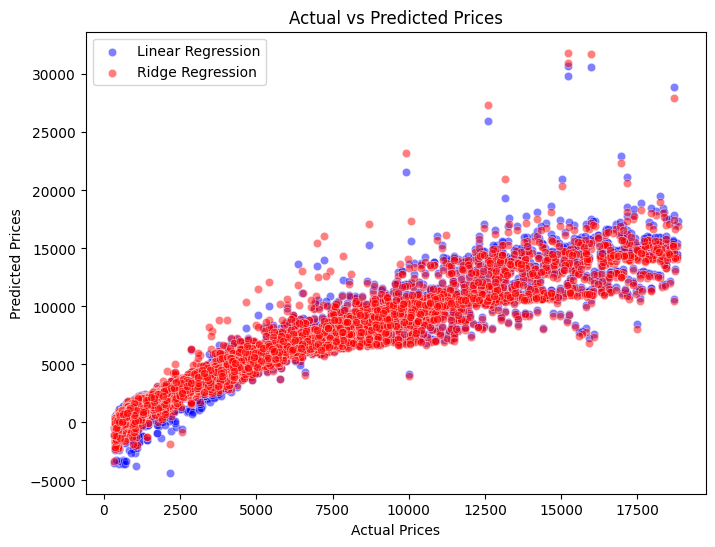

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the Diamonds dataset from seaborn
df = sns.load_dataset("diamonds")

# Display first few rows before preprocessing
display(df.head())

# Drop irrelevant columns and handle missing values
df.dropna(inplace=True)  # Removing missing values

# Manually define categorical and numerical features
categorical_features = ["cut", "color", "clarity"]
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop("price")

# Convert categorical features to string (ensure they are properly treated)
for col in categorical_features:
    df[col] = df[col].astype(str)

# Print detected categorical features
print("Categorical features detected:", categorical_features)

# Verify unique values in categorical features
print("Unique categories per feature before encoding:")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

# Print dataset details
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features before encoding and scaling: {df.shape[1] - 1}")  # Excluding target variable

# ---- Feature Encoding and Scaling ----

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Drop first category to avoid redundancy
categorical_encoded = encoder.fit_transform(df[categorical_features])

# Convert encoded features into a DataFrame with proper column names
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(input_features=categorical_features))

# Standardize numerical features to bring them to the same scale
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Combine processed features into a single dataset
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)

# Target variable
y = df["price"]

# Print number of features after encoding and scaling
print(f"Number of features used in model: {X.shape[1]}")

# Split data into training and testing sets (after scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Feature Correlation Heatmap ----
corr_matrix = pd.concat([df[numerical_features], df["price"]], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# ---- Train Multiple Linear Regression Model ----
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set using Linear Regression
y_pred = model.predict(X_test)

# Evaluate Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse:.2f}")
print(f"R-squared Score (Linear Regression): {r2:.4f}")

# ---- Train Ridge Regression (L2 Regularization) ----
alpha_value = 100  # Adjust this value (try 10, 100, 1000)
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Predict on test set using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge Regression, alpha={alpha_value}): {mse_ridge:.2f}")
print(f"R-squared Score (Ridge Regression, alpha={alpha_value}): {r2_ridge:.4f}")

# Compare model coefficients
print("\nLinear Regression Coefficients:")
print(model.coef_)
print("\nRidge Regression Coefficients:")
print(ridge_model.coef_)

# ---- Plot Actual vs Predicted Prices ----
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label="Linear Regression", color="blue")
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5, label="Ridge Regression", color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


###Todo Task 01
#### Observations:

Model performance (MSE: 1288705.48, R-squared: 0.9189) improved after encoding and scaling, which indicates that the model is now better able to capture the relationships between the features and the target variable (price). This is evident from the higher R-squared value (0.9189) and the lower mean squared error (1288705.48), indicating better accuracy.

Encoding: Converts categorical variables (which are non-numeric) into a numerical format that machine learning algorithms can process. It also avoids misinterpretation of categorical data as continuous or ordinal.

Scaling: Standardizes numerical features to a similar range, preventing larger numerical values from dominating the model. It ensures that all features contribute equally to the model’s learning process.

Hence, encoding and scaling are crucial for improving model accuracy and handling different feature types effectively.


###Todo Task 02
####Observations

When applying Ridge regularization with a large alpha value (alpha=100), we observed a slight decrease in performance.
The R-squared score decreased from 0.9189 (Linear Regression) to 0.9137 (Ridge Regression).
The Mean Squared Error (MSE) also increased from 1288705.48 to 1371290.77.

This indicates that the large regularization term caused the model to underfit the data, resulting in a simpler model that didn't capture the complexities of the dataset as well as the Linear Regression model.

####Advantage of Regularization:

Regularization (Ridge) prevents overfitting by adding a penalty to large coefficients, ensuring the model generalizes better to new, unseen data. While it might reduce performance slightly on the training data, it helps the model perform better on unseen data by avoiding overly complex models.

A small alpha value would make the regularization less impactful, whereas a large alpha could lead to underfitting.